# Week 6 handin - by Benjamin S (cph-bs190)

## Assignment

### Ex 1
Create a module containing a class: TextComparer with the following methods:
1. `__init__(self, url_list)`
2. `download(url,filename)` that stores the file on disk and raises NotFoundException when url returns 404
3. `multi_download()` uses threads to download multiple urls as text and stores filenames on a property of the TextComparer class object (Hint: use the download() method and create the filenames from the url or from the response object)
4. `__iter__()` returns an iterator
5. `__next__()` returns the next filename (and stops when there are no more)
6. `urllist_generator()` returns a generator to loop through the urls
7. `avg_vowels(text)` - a rough estimate on readability returns average number of vowels in the words of the text
8. `hardest_read()` reads all text from files in `filenames` and returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

### Ex 2
Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class
3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

## Status
I have completed all exercises.

# Exercise 1
### 1 - 8 can be found in modules/text_comparer.py

# Exercise 2
### 1.

In [23]:
from modules.text_comparer import TextComparer
from urllib.parse import urlparse

urls = [
    "https://www.gutenberg.org/files/84/84-0.txt", 
    "https://www.gutenberg.org/files/1342/1342-0.txt", 
    "https://www.gutenberg.org/files/64317/64317-0.txt", 
    "https://www.gutenberg.org/files/1080/1080-0.txt", 
    "https://www.gutenberg.org/files/2542/2542-0.txt", 
    "https://www.gutenberg.org/files/11/11-0.txt", 
    "https://www.gutenberg.org/files/98/98-0.txt", 
    "https://www.gutenberg.org/files/844/844-0.txt", 
    "https://www.gutenberg.org/cache/epub/5200/pg5200.txt", 
    "https://www.gutenberg.org/files/2701/2701-0.txt"
    ]

my_text_comparer = TextComparer(urls)
results = my_text_comparer.multi_download()
print(len(results), "books have been added to the books folder")

10 books have been added to the books folder


### 2.

In [30]:

# Testing __iter__ and __next__

iterator = my_text_comparer.__iter__()

# Run this cell multiple times to go through all filenames in the object's file_names list. 
# Will raise StopIteration exception when it reaches the end of the list. 
# (I also reset the index when the exception occurs so you can start over)
print(iterator.__next__())

# url_list generator
generator = my_text_comparer.urllist_generator()
print("\n", type(generator))
print([url for url in my_text_comparer.urllist_generator()])

# avg_vowels
file_name = my_text_comparer.file_names[0]
book = my_text_comparer.avg_vowels(file_name)
print("\nText:", book["name"], "\nAverage vowels in words of text:", book["avg_vowels"])

# hardest_read
hardest_book = my_text_comparer.hardest_read()
print("\nHardest book is", hardest_book["name"], "with an average of", hardest_book["avg_vowels"], "vowels per word.")



64317-0.txt

 <class 'generator'>
['https://www.gutenberg.org/files/84/84-0.txt', 'https://www.gutenberg.org/files/1342/1342-0.txt', 'https://www.gutenberg.org/files/64317/64317-0.txt', 'https://www.gutenberg.org/files/1080/1080-0.txt', 'https://www.gutenberg.org/files/2542/2542-0.txt', 'https://www.gutenberg.org/files/11/11-0.txt', 'https://www.gutenberg.org/files/98/98-0.txt', 'https://www.gutenberg.org/files/844/844-0.txt', 'https://www.gutenberg.org/cache/epub/5200/pg5200.txt', 'https://www.gutenberg.org/files/2701/2701-0.txt']

Text: 84-0.txt 
Average vowels in words of text: 1.6783804912493065

Hardest book is 1080-0.txt with an average of 1.758507462686567 vowels per word.


### 2. continued (just for exception)

In [29]:
# Testing download exception
my_text_comparer.download("https://www.gutenberg.org/nothinghere", "testingexception.txt")

NotFoundException: 

### 3.

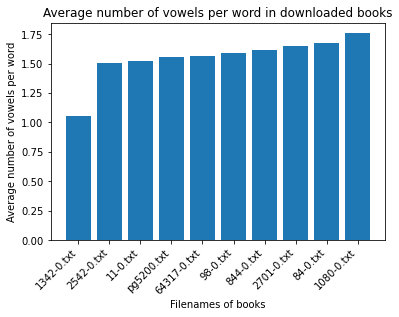

In [25]:
import matplotlib.pyplot as plt

book_list = []
all_books_dict = {}
for file_name in my_text_comparer.file_names:
    book_list.append(my_text_comparer.avg_vowels(file_name))

def sort_by_avg(e):
    return e["avg_vowels"]

book_list.sort(key=sort_by_avg)

for book in book_list:
    all_books_dict[book["name"]] = book["avg_vowels"]

plt.bar(all_books_dict.keys(), all_books_dict.values())
plt.title("Average number of vowels per word in downloaded books")
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.xlabel("Filenames of books")
plt.ylabel("Average number of vowels per word")
plt.show()


